# Processing and manipulation of images

Here we deal with manipulation (i.e. alteration) and processing of images in Python.
For this we will use the Python packages ```matplotlib```, ``Numpy``, ``Scipy`` and ```scikit-image``` to apply different filters and other alterations.

The processing tasks include basic things like image input, display and output as well as simple manipulations like cropping, flipping and rotating the images.<br>
Further processing enables denoising, sharpening as well as segmentation and classification with some help of neural networks.<br>
***
In the following links you can find additional information and documentation to the packages used in this tutorial:<br>
[OpenCV Python Tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/index.html)<br>
[matplotlib API Overview](https://matplotlib.org/3.2.1/api/index.html)<br>
[Scipy Docs](https://docs.scipy.org/doc/scipy/reference/)<br>
[Numpy Manual](https://numpy.org/doc/1.18/)<br>

## Basics

Images are represented as arrays, to be more precise in the shape of *2- or 3-dimensional numerical arrays*. In our case images are Numpy arrays, which we can modify with mathematical formulas. <br>
For better visualisation and understanding we create a chessboard with help of  ```Numpy``` and ```Matplotlib```.<br>
The result represents a black and white image and at the same time a 2-dimensional numerical array.

The chessboard consists of the array:


(8, 8)

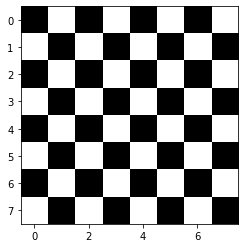

In [1]:
import numpy as np
brett = np.zeros((8, 8))
brett[::2, 1::2] = 1
brett[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(brett, cmap='gray', interpolation='nearest') 
print("The chessboard consists of the array:") 
brett.shape 

### Colored images
Since images in color need an additional channels to display the different collers, a 2-dimensional array is not sufficient.<br>
Now we load a colored image:

In [2]:
import skimage
from skimage import io
import os

img = io.imread('img/Einstein.png')
print("Dimensions:")
img.shape

Dimensions:


(1024, 857, 3)

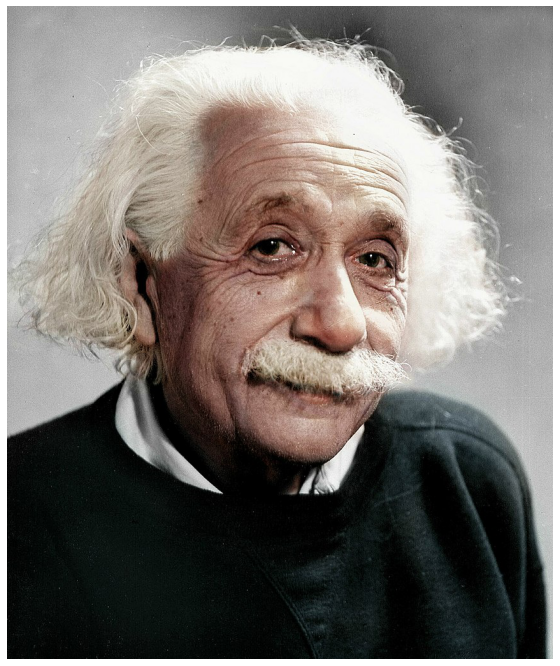

In [3]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
show(img)

As we can see, another dimension has been added with the value 3 (RGB). Now the shape is (N, M, 3).<br>

### Exercise 1:
Now alter the image to ```sign60.png``` and explain what has changed.

In [4]:
sign = io.imread('img/sign60.png')
print("Dimensions:")
sign.shape

Dimensions:


(200, 200, 4)

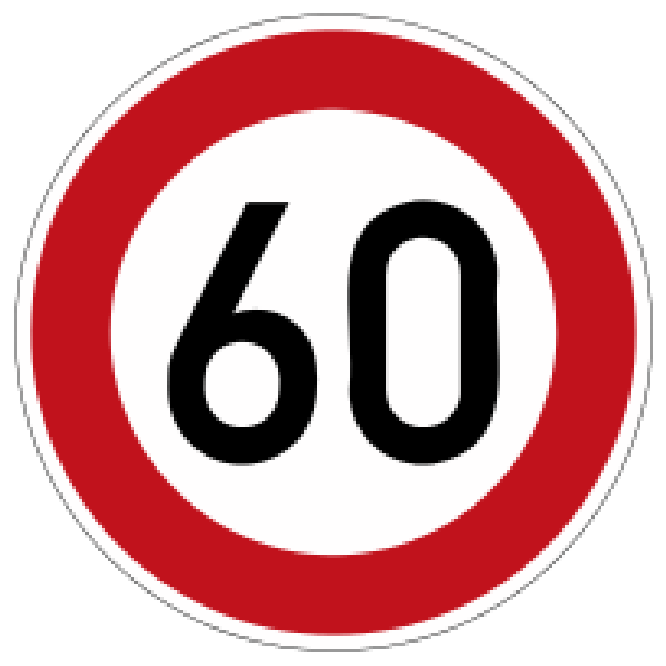

In [5]:
show(sign)

As we see, the image has an alpha channel for transparency with the following shape: (N, M, 4).
We can visualise the image like this:<br>
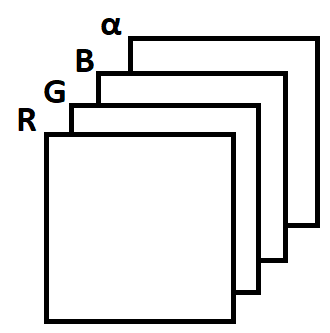

## Processing and manipulation

The manipulation and processing of images forms the basis for various aspects of machine vision and machine learning.<br>
On the one hand filters/kernels are the basis for processing in artificial neural networks (Convolutional Neural Network = **CNN**), on the other hand filters/kernels and other operations are the basis for data augmentation.<br>

### Kernels and Filters

In the begining we need to make a distinction between *Kernel* and *Filter*.<br>
A kernel (sometimes refered to as a filter kernel) is a matrix of weights, which is multiplied to another input matrix (e.g. b&w image) -> 2-dimensional<br>
A filter is a set of multiple kernels, and each kernel is assigned to a certain channel of the input. -> 3-dimensional<br><br>
Short: **Filtering is convolution with multiple kernels**
***
More information about filters and kernels:<br>
[Filtering](https://en.wikipedia.org/wiki/Digital_image_processing#Filtering)<br>
[Kernel (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

### Filters/Kernels in machine learning

In the environment of *machine learning* and *image processing*, filters offer the possibility to process images in many different ways. This process is called *pre-processing*.
On the one hand, certain areas can be displayed more intensively, especially the edges of objects. On the other hand, filters can be used to reduce unwanted disturbances, such as image noise.
This serves the purpose of increasing the accuracy and the recognition rate.

A well-known filter is the **Gaussian filter** (blur filter).
This can be represented as 3x3 matrix as follows:

In the case of the Gaussian filter, a blur is used to smoothen the image. This results in suppressing noise and reducing the moire pattern.

##### But how does it work?
If a filter kernel is now applied to the input, a convolution operation is performed and the input matrix (in our case the input image) changes.

Visualisation of a sharpening filter:
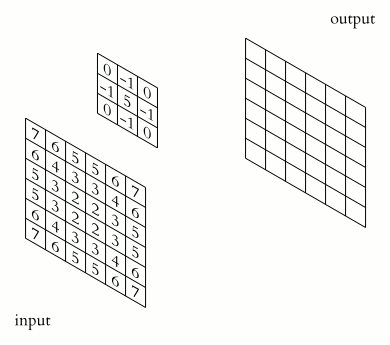
Source: Michael Plotke, Creative-Commons-License: CC BY-SA 3.0, https://de.wikipedia.org/wiki/Datei:2D_Convolution_Animation.gif

Now lets take a look at some frequently used filters.

#### [Median filter](https://en.wikipedia.org/wiki/Median_filter)

This smoothing filter is a simple linear filter and is mainly used for noise suppression. A median is formed from the values of the pixels in the environment and replaced accordingly. In the process, the image loses detail and thus information. Sharp edges are blurred to a smooth transition.

<table>
  <tr>
    <th>Median filter kernel</th> 
  </tr>    
  <tr>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1/9 x </td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td></td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
</table>

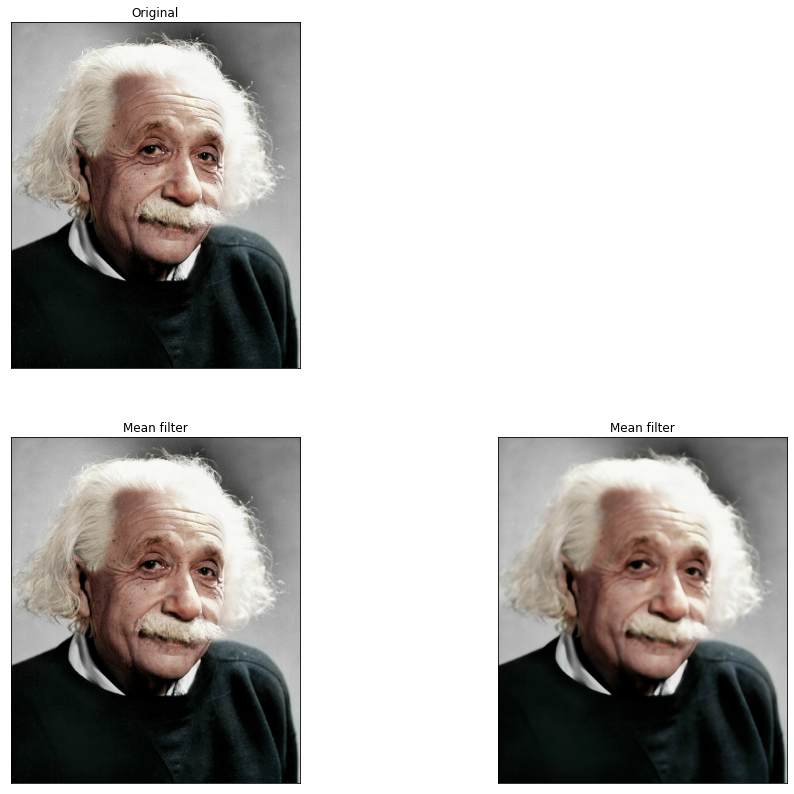

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread('img/Einstein.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # conversion from RGB to HSV

blur1_image = cv2.medianBlur(image, 3)
blur2_image = cv2.medianBlur(image, 9)
plt.figure(figsize=(16,14))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(cv2.cvtColor(blur1_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(cv2.cvtColor(blur2_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

#### [Gaussian filter](https://en.wikipedia.org/wiki/Gaussian_blur)
The Gaussian filter is similar to the median filter, but uses a weighted core. This means that when the new value is formed, the neighboring  cells are more significant than those further away. This results from the typical Gaussian distribution.

<table>
  <tr>
    <th>Gaussian filter kernel</th> 
  </tr>    
  <tr>
    <td></td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1/16 x </td>
    <td>2</td>
    <td>4</td>
    <td>2</td>
  </tr>
  <tr>
    <td></td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
  </tr>
</table>

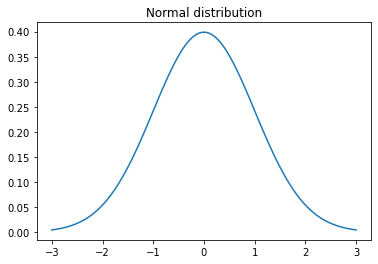

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma)),plt.title('Normal distribution')
plt.show()

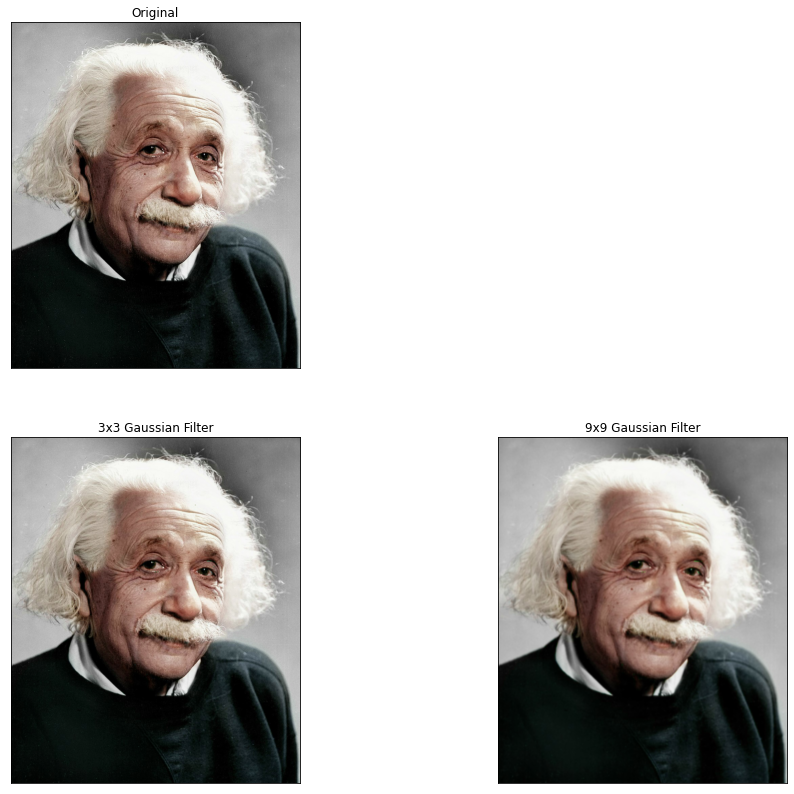

In [8]:
gauss1_image = cv2.GaussianBlur(image, (3, 3),0)
gauss2_image = cv2.GaussianBlur(image, (9, 9),0)
plt.figure(figsize=(16,14))
plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(cv2.cvtColor(gauss1_image, cv2.COLOR_HSV2RGB)),plt.title('3x3 Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(cv2.cvtColor(gauss2_image, cv2.COLOR_HSV2RGB)),plt.title('9x9 Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

#### [Laplacian filter](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)
This filter is used for edge detection. Edges can be recognized as strong gradients of brightness in the image, i.e. the progression of the values with the highest rate of change. An edge is detected where the colors change quickly and strongly. A possible Laplace filter looks like this:
<table>
  <tr>
    <th>Laplace-Filter Matrix</th> 
  </tr>    
  <tr>
    <td></td>
    <td>0</td>
    <td>-1</td>
    <td>0</td>
  </tr>
  <tr>
    <td></td>
    <td>-1</td>
    <td>4</td>
    <td>-1</td>
  </tr>
  <tr>
    <td></td>
    <td>0</td>
    <td>-1</td>
    <td>0</td>
  </tr>
</table>

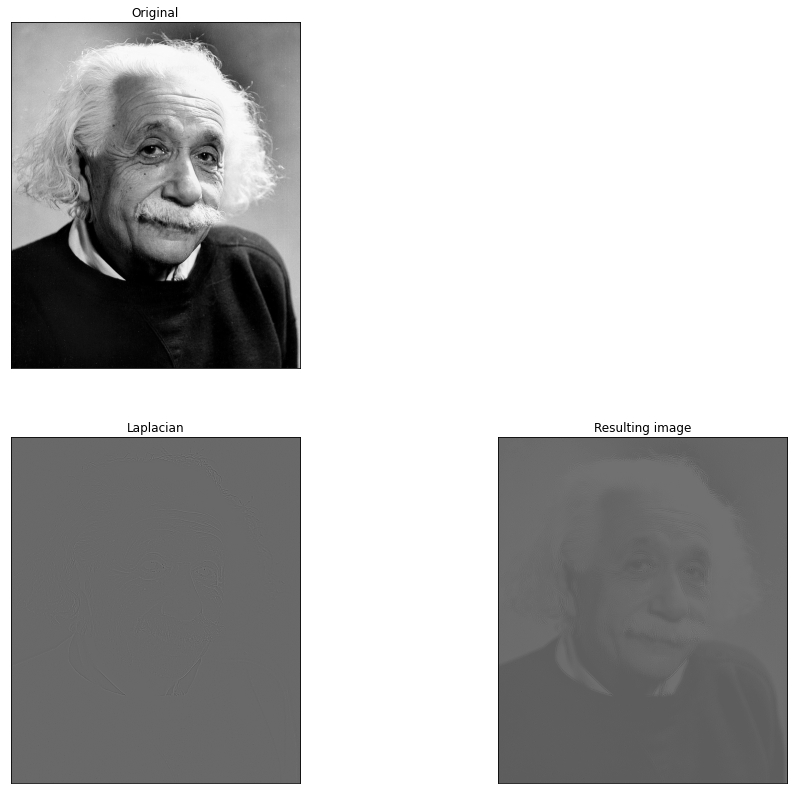

In [9]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

laplace_image = cv2.Laplacian(image2,cv2.CV_64F, ksize=3) #you might want to increase ksize in binder environment 
plt.figure(figsize=(16,14))
plt.subplot(221), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(laplace_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(image2 + laplace_image, cmap='gray'),plt.title('Resulting image') # combination of 2 images
plt.xticks([]), plt.yticks([])
plt.show()

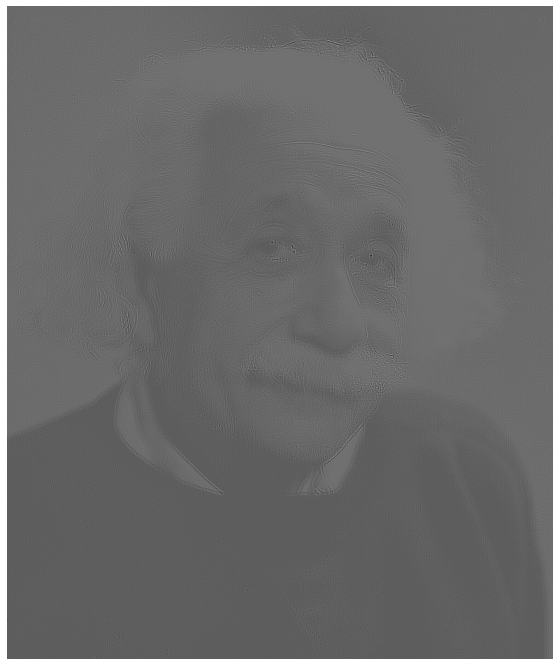

In [10]:
show(image2 + laplace_image)

We can see that although the edges have been sharpened, the image noise has also been greatly increased.
Can we perhaps improve the result?<br><br><br>

#### Combinating different filters

Combination of a Gaussian and Laplacian filter


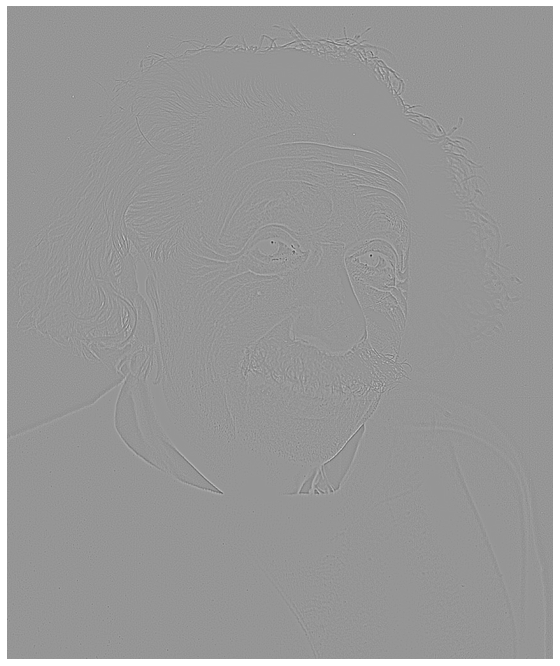

In [11]:
gauss1_image = cv2.GaussianBlur(image2, (3, 3),0)
laplace3_image = cv2.Laplacian(gauss1_image,cv2.CV_64F)
print("Combination of a Gaussian and Laplacian filter")
show(laplace3_image)

#### [Sobel Filter](https://en.wikipedia.org/wiki/Sobel_operator)

This is also an edge detection filter, which works with the first derivative of the brightness values. This can be the derivative of x or y.

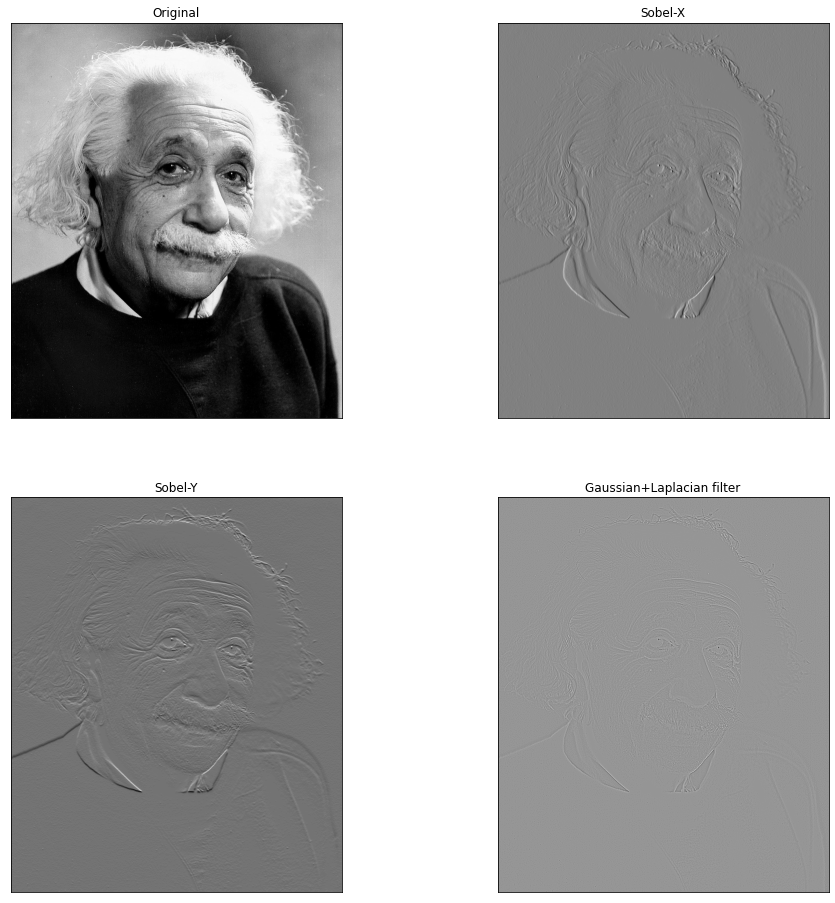

In [12]:
sobelx = cv2.Sobel(image2,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image2,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(16,16))
plt.subplot(221), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(sobelx, cmap='gray'),plt.title('Sobel-X')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sobely, cmap='gray'),plt.title('Sobel-Y')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(laplace3_image, cmap='gray'),plt.title('Gaussian+Laplacian filter')
plt.xticks([]), plt.yticks([])
plt.show()

#### Summary
By choosing the right filters, undesirable image disturbances can be eliminated and striking structures such as edges can be reinforced for neural networks.

#### Exercise 2
Create an image with the help of the presented filters, which shows as distinct edges as possible.
You can find some common licenced images in the folder ```img_ex/imgname.jpg```.<br>
```sign_1.jpg```<br>
```sign_2.png```<br>
```stop.jpg```<br>
```street_1.jpg```<br>
```street_2.jpg```<br>
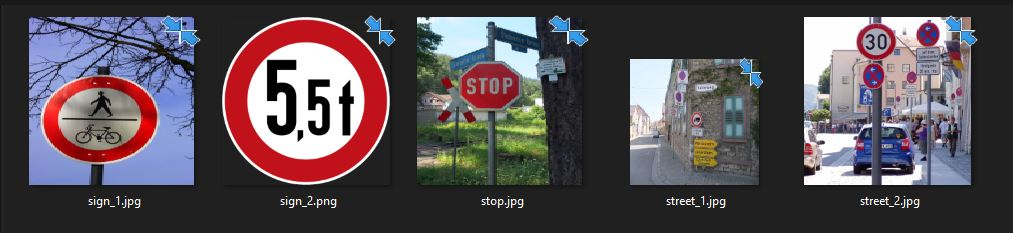

If you've finished your exercise, safe and download your notebook. Upload it in the e-learning/moodle directory created by Prof. Dr. Meyer.

### Data augmentation
Another use for manipulation and processing of images is data augmentation.<br>
With data augmentation, additional images are generated from a limited database by modifying it.<br>
#### Why data augmentation?
The background to this action is the problem of overfitting. This means the *machine learning* model is over-adapted to the training data and can no longer be generally applied to other, new data.<br>
<p style="color:white;background-color:#85C1E9;">Overfitting example:<br> You are feeding your model with 1000 different pictures of your dog (lets asume it is a Labrador). At some point your model is starting to learn on small individual details or even the noise in your pictures.<br> With such a model aplied to new data (other pictures of other Labradors) the accuracy is going to be very low.</p><br>
In an optimal case, a model would have an infinite amount of data available from which infinitely different patterns can be learned.
Since in reality there is only a limited amount of data and you want to counteract overfitting, you can expand the database with the help of augmentation.

The following options are available:

- Rotation
- Mirroring
- Deformation
- Change using filters
- injecting random noise

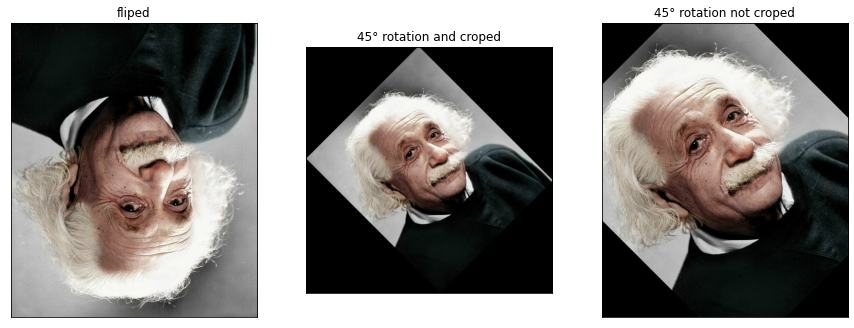

In [13]:
from scipy import ndimage

flip_ud_face = np.flipud(img)

rotate_face = ndimage.rotate(img, 45)
rotate_face_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.figure(figsize=(15,12))
plt.subplot(131), plt.imshow(flip_ud_face, cmap='gray'),plt.title('fliped')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(rotate_face, cmap='gray'),plt.title('45° rotation and croped')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(rotate_face_noreshape, cmap='gray'),plt.title('45° rotation not croped')
plt.xticks([]), plt.yticks([])
plt.show()

#### Exercise 3

We would like to expand our database of traffic signs using data augmentation. Which problems could arise? Give examples.
You can find more image processign here: [scipy.ndimage doc](https://docs.scipy.org/doc/scipy/reference/ndimage.html)
If you've finished your exercise, safe and download your notebook. Upload it in the e-learning/moodle directory created by Prof. Dr. Meyer.

#### Answer for Exercise 3:

~ Type your Answer here